<a href="https://colab.research.google.com/github/Ahil-official/E-Commerce-Transactions-Analysis-and-Modelling/blob/main/eCommerce_Transactions_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Exploratory Data Analysis (EDA) and Business Insights

Import the necessary libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 Load Data

In [ ]:
customers_path = '/content/Customers.csv'
products_path = '/content/Products.csv'
transactions_path = '/content/Transactions.csv'


customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

 Explore Data

In [ ]:
print("Customers Dataset:")
print(customers_df.head())
print("\nProducts Dataset:")
print(products_df.head())
print("\nTransactions Dataset:")
print(transactions_df.head())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

Check for missing values in each dataset

In [ ]:
print("\nMissing Values:")
print("Customers:")
print(customers_df.isnull().sum())
print("Products:")
print(products_df.isnull().sum())
print("Transactions:")
print(transactions_df.isnull().sum())


Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Data Cleaning

In [ ]:
print("\nDuplicate Rows:")
print(f"Customers: {customers_df.duplicated().sum()} duplicates")
print(f"Products: {products_df.duplicated().sum()} duplicates")
print(f"Transactions: {transactions_df.duplicated().sum()} duplicates")


Duplicate Rows:
Customers: 0 duplicates
Products: 0 duplicates
Transactions: 0 duplicates


Merge Datasets for Comprehensive Analysis

In [ ]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, products_df, on='ProductID', how='left')


Display merged dataset

In [ ]:
print("\nMerged Dataset:")
print(merged_df.head())


Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving 

EDA with Visualizations
1. Total revenue by product categ

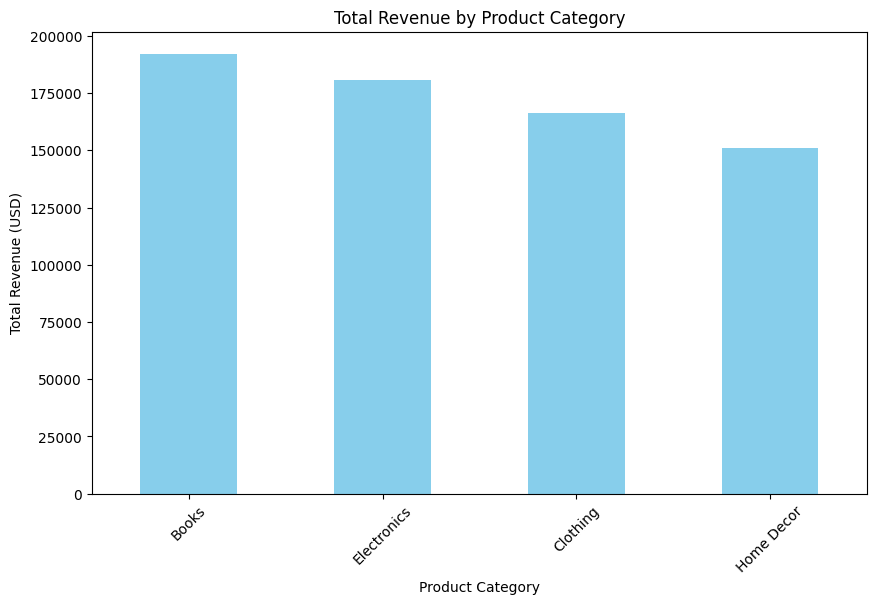

In [ ]:
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product Category')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

2. Number of customers by region

<ipython-input-44-d75cd6d48900>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_customers.index, y=region_customers.values, palette='viridis')


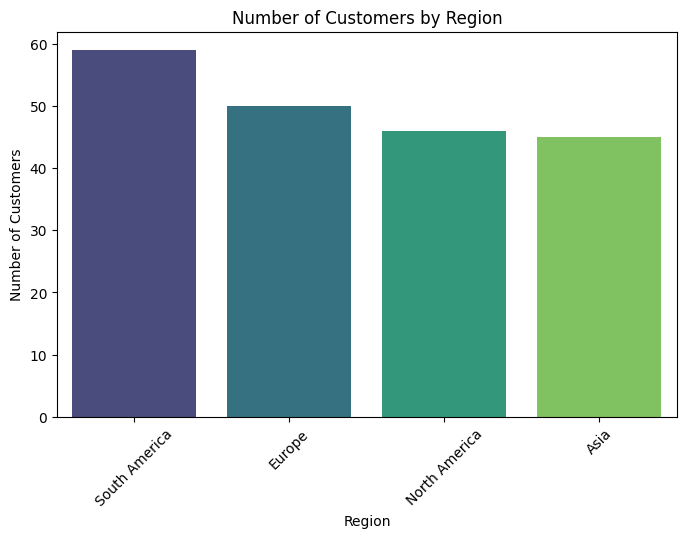

In [ ]:
region_customers = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_customers.index, y=region_customers.values, palette='viridis')
plt.title('Number of Customers by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

Trend of transactions over time

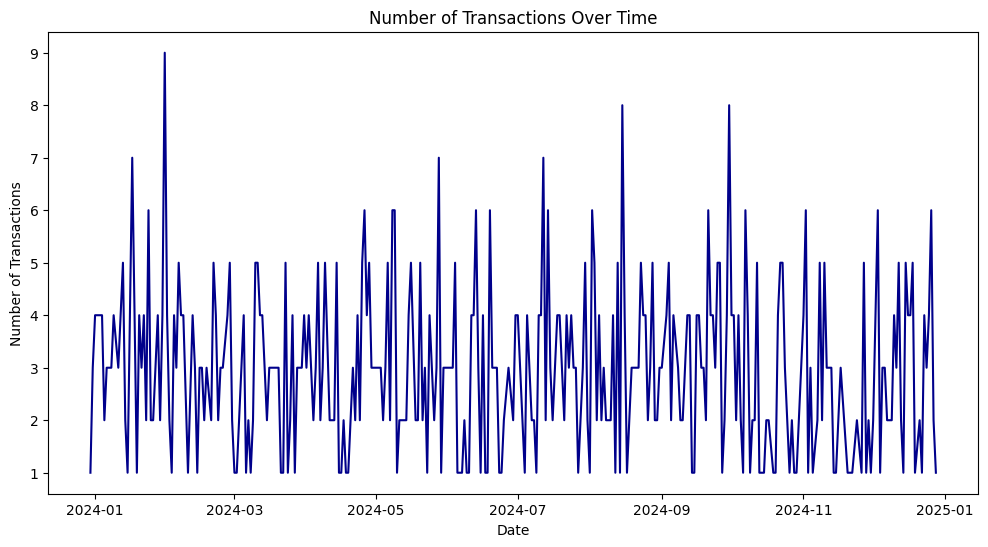

In [ ]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
transactions_over_time = merged_df.groupby(merged_df['TransactionDate'].dt.date)['TransactionID'].count()
plt.figure(figsize=(12, 6))
transactions_over_time.plot(color='darkblue')
plt.title('Number of Transactions Over Time')
plt.ylabel('Number of Transactions')
plt.xlabel('Date')
plt.show()

Top 5 products by total revenue

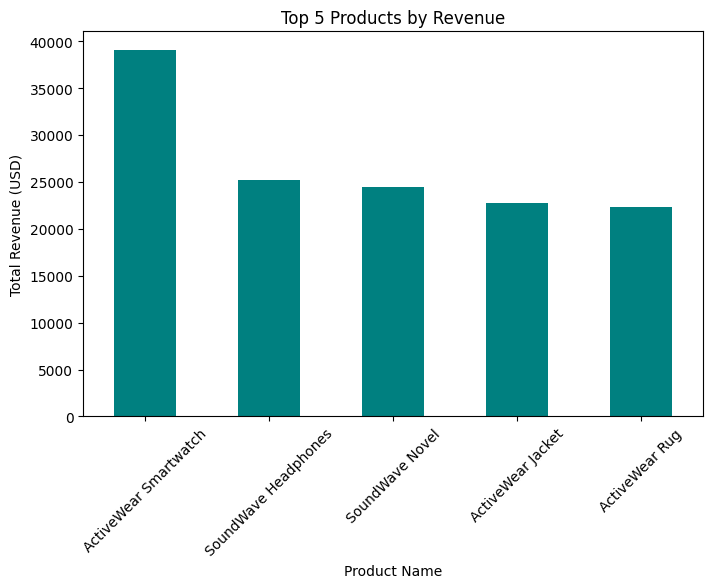

In [ ]:
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='teal')
plt.title('Top 5 Products by Revenue')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()


5. Average order value by region

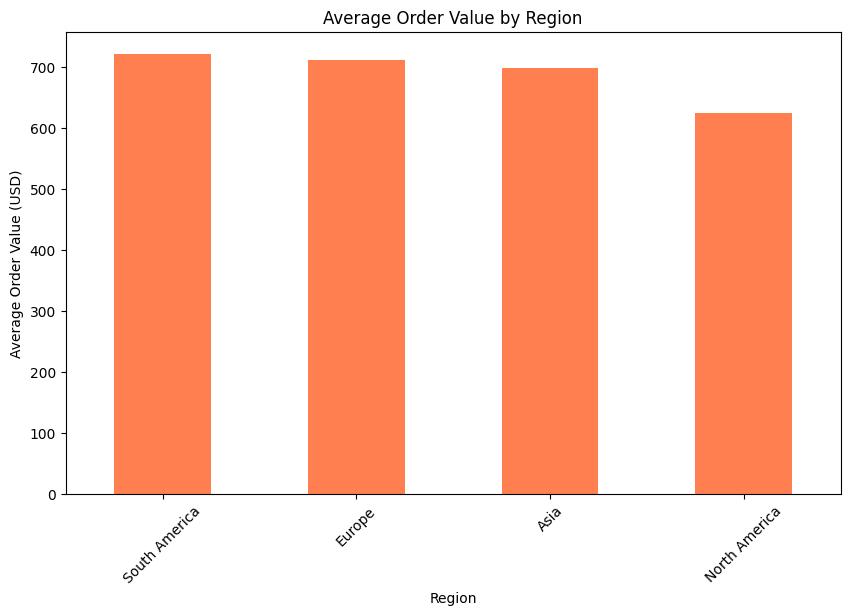

In [ ]:
avg_order_value = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_order_value.plot(kind='bar', color='coral')
plt.title('Average Order Value by Region')
plt.ylabel('Average Order Value (USD)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

Saving EDA results

In [ ]:
merged_df.to_csv('Merged_Dataset.csv', index=False)

Task 2: Lookalike Model
Step 1: Import required libraries for modeling

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

Step 2: Prepare data for similarity calculations

In [ ]:
customer_features = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': 'count'  # Assuming 'ProductID' is available to get the mean
}).reset_index()

Normalize features

In [ ]:
customer_features_scaled = customer_features.copy()
customer_features_scaled.iloc[:, 1:] = (customer_features_scaled.iloc[:, 1:] - customer_features_scaled.iloc[:, 1:].mean()) / customer_features_scaled.iloc[:, 1:].std()


<ipython-input-52-25715c5fa599>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     -0.121726
1     -0.446873
2      0.203421
3      1.666584
4     -0.934594
         ...   
194   -0.121726
195   -0.609447
196   -1.584888
197   -0.609447
198    0.528568
Name: Quantity, Length: 199, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  customer_features_scaled.iloc[:, 1:] = (customer_features_scaled.iloc[:, 1:] - customer_features_scaled.iloc[:, 1:].mean()) / customer_features_scaled.iloc[:, 1:].std()
<ipython-input-52-25715c5fa599>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     -0.011429
1     -0.466318
2     -0.466318
3      1.353237
4     -0.921207
         ...   
194   -0.466318
195   -0.921207
196   -1.376095
197   -0.466318
198   -0.011429
Name: ProductID, Length: 199, dtype: fl

Step 3: Compute similarity

In [ ]:
similarity_matrix = cosine_similarity(customer_features_scaled.iloc[:, 1:])

Step 4: Generate lookalike recommendations for first 20 customers

In [ ]:
lookalike_results = {}
for i, customer_id in enumerate(customer_features_scaled['CustomerID'][:20]):
    similar_indices = np.argsort(-similarity_matrix[i])[1:4]
    similar_customers = customer_features_scaled.iloc[similar_indices]['CustomerID']
    similarity_scores = similarity_matrix[i, similar_indices]
    lookalike_results[customer_id] = list(zip(similar_customers, similarity_scores))

Save Lookalike results

In [ ]:
lookalike_df = pd.DataFrame({
    'CustomerID': list(lookalike_results.keys()),
    'Lookalikes': [str(val) for val in lookalike_results.values()]
})
lookalike_df.to_csv('Lookalike.csv', index=False)

#Task 3: Customer Segmentation / Clustering
Step 1: Import libraries for clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

 Step 2: Prepare data for clustering

In [ ]:
clustering_features = customer_features_scaled.iloc[:, 1:]

 Step 3: Perform clustering

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_features)
clusters = kmeans.labels_


Step 4: Evaluate clustering

In [ ]:
db_index = davies_bouldin_score(clustering_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8967286185530716


 Step 5: Visualize clusters with PCA

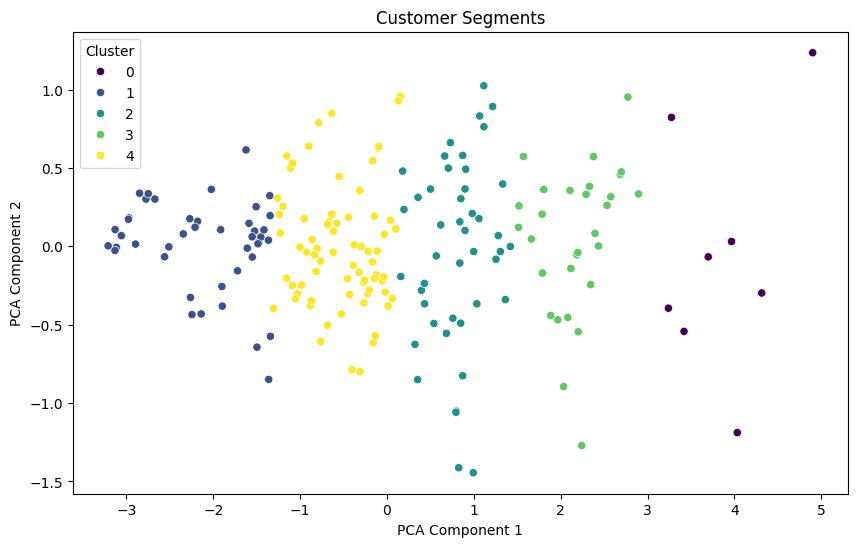

In [ ]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(clustering_features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


Save clustering results

In [ ]:
customer_features['Cluster'] = clusters
customer_features.to_csv('Customer_Segments.csv', index=False)

Revenue Per Month Visualization

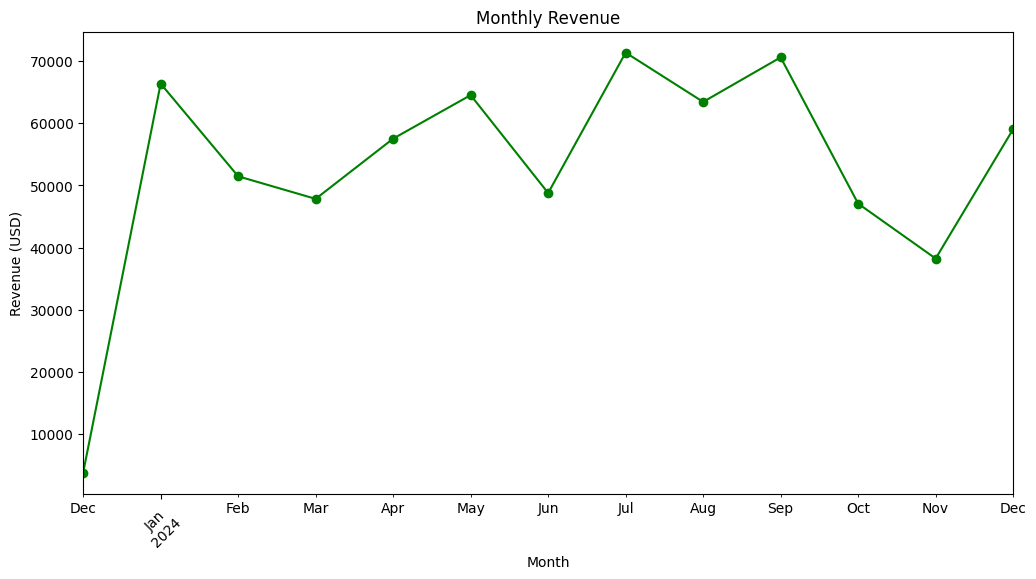

In [ ]:
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_df.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Monthly Revenue')
plt.ylabel('Revenue (USD)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()